<h1 style="color: navy bleu;text-align:center">  M2 MAS DS- Problèmes inverses et optimisation convexe 2021


<h1 style="color: navy bleu;text-align:center"> Rendu du Tp1 : Premiers Problèmes Inverses

<h3 style="color: navy bleu"> Saïda Guezoui, groupe DS </h3>

<h2 style="color: navy bleu"> I. Introduction 

Dans ce tp, nous allons utiliser comme données, l'image de Lena, surnommée « La première dame d’Internet ». En effet, c'est l'une des images les plus utilisées depuis 1973 car elle comporte des caractéristiques particulières et de mélange de détails, d’aplat de couleurs, de textures et d’ombres. Cela permet de tester une grande variété d’algorithmes de filtrage, de segmentation ou de compression. Elle est de dimension 512 x 512 pixels et a donc été obtenue après avoir coupé la version initiale d’un portrait de femme au niveau des épaules.

<img src="lena.png" alt="Lena" width="128" height="128"/>

Avant de commencer, nous importons les bibliothèques nécessaires pour ce tp. 


In [44]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np

<h2 style="color: navy bleu"> II. Manipulation des données 

<h3 style="color: navy bleu">  A. Chargement de l'image 

In [45]:
#on charge l'image de lena à l'aide de la fonction imread de la bibliothèque image de matplotlib
y = mpimg.imread("lena.png")

#on ne garde que la première composante car niveau de gris
y = y[:,:,0];
# google colab
# y=y[:,:];

#l'image est de type int ou float on la cast en float pour pouvoir faire des calculs
# et on la remet à l'échelle si besoin
if (y.dtype == 'float32') :
    y = y * 255
y = y.astype(float)

#la taille de l'image à l'aide de l'attribut shape
[n1,n2] = y.shape

# on affiche le maximum et le minimum pour vérifier que les valeurs de niveau de gris varient 
# bien entre 0 et 255 (et pas 0 et 1 par exemple)

print([y.min(), y.max()])

[25.0, 245.0]


Une fois l’image est numérisée, elle se traduit par une fonction f(x , y) qui associe au pixel de coordonnées (x,y) un niveau de gris f(x ;y), sous forme d'un entier entre 0 (blanc) et 255 (noir). On a donc une fonction à 2 variables (x ;y) prenant ses valeurs entières entre 0 et 255 et qui peut se représenter par un fichier numérique. Ici, on remarque que les valeurs de niveaux de gris varient entre 25 et 245. 

<h3 style="color: navy bleu"> B. Affichage de l'image

Afin d'afficher l'image, nous allons utiliser la fonction "imshow" de la bibliothèque pyplot de matplotlib. En changeant le paramètre "cmap", nous pouvans afficher la photo en gris ou avec des couleurs. 

Text(0.5, 1.0, "Image originale avec d'autres couleurs")

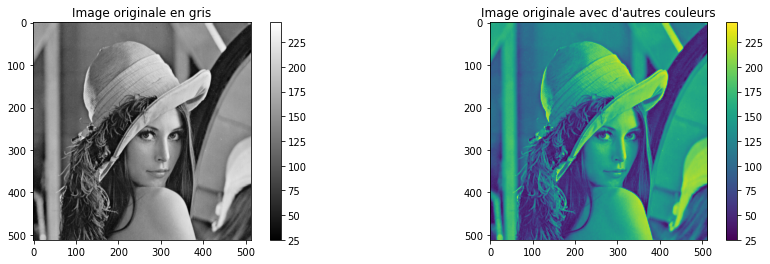

In [46]:
#on donne une taille à la figure
plt.figure(figsize =(15,4))

# colonne 1 pour la première image
plt.subplot(1,2,1)
#on l'affiche en niveau de gris
plt.imshow(y, cmap="gray")
#on affiche la palette de couleur (colorbar) associée
plt.colorbar()
#on lui donne un titre
plt.title('Image originale en gris')

# colonne 2 pour la deuxième image  
plt.subplot(1,2,2)
plt.imshow(y, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("Image originale avec d'autres couleurs")


<h3 style="color: navy bleu"> C. Affichage de la transformée de Fourier


En réalité on visualise ici le module de la tranformée de Fourier. On fera attention ici à l'utilisation de la fonction  fftshift qui permet de réordonner les fréquences. Il existe un algorithme rapide permettant
de calculer les transformées de Fourier directe et inverse : l’algorithme FFT (Fast Fourier Transform).

Text(0.5, 1.0, 'log à base 10 du module précédent \n')

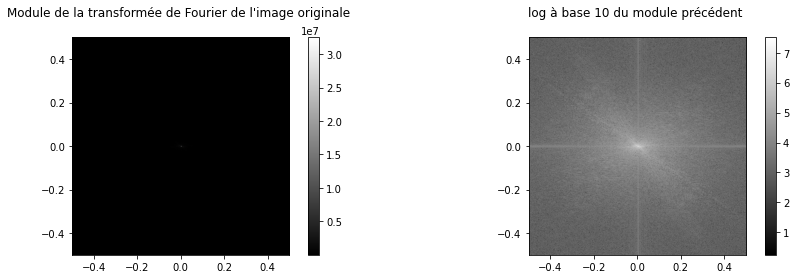

In [47]:
# on calcule le module de la transformée de Fourier de l'image
fy = np.abs(np.fft.fft2(y));

# on affiche le module de la transformée de Fourier avec les axes des fréquences correspondants
# on note l'utilisation de "fftshift" qui permet de réarranger l'ordre l'image et
# de l'option "extent" qui labellise les axes.
plt.figure(figsize =(15,4))
#colonne 1 pour la première image  
plt.subplot(1,2,1)
plt.imshow(np.fft.fftshift(fy), cmap="gray", extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title("Module de la transformée de Fourier de l'image originale \n")

# pour mieux voir on peu afficher le log du module
# colonne 2 pour la deuxième image  
plt.subplot(1,2,2)
plt.imshow(np.log10(np.fft.fftshift(fy)), cmap="gray", extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title('log à base 10 du module précédent \n')

En affichant le module de la transformée de Fourier avec les axes des fréquences correspondants, l'image est noire et on n'arrive pas à bien voir. En revanche, avec le log à base 10 du module permetant de voir quels sont les alignement présents dans l’image, le résultat montre une apparition des directions horizontales, verticales et dans une diagonale qui correspondent au chapeau. La phase contient une information importante liée à la position des éléments.

<h2 style="color: navy bleu"> III. Problème direct

On s'intéresse premièrement au problème direct, c'est à dire, comment générer des observations $z$ à partir de données originales $y$. 
On rappelle que le problème d'observation s'écrit
\begin{equation}
z=\mathcal{D}_\alpha(Ly)
\end{equation}
où 
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $L$ : opérateur linéaire (un opérateur de convolution par exemple)</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit).</li>
</ul>

### $L$ modélise une convolution
On considère dans un premier temps que l'opérateur linéaire $L$ modélise une convolution.

#### Rappels
On considère ici des images et plus généralement des suites finies de taille $N_1\times N_2$.
Pour $g$ une telle suite finie, on notera $g=(g_{n_1,n_2})$ c'est-à-dire que la valeur de $g$ à l'indice $(n_1,n_2)$ est $g_{n_1,n_2}$ pour $n_1=0,.., N_1-1$ et $n_2=0,.., N_2-1$.

On rappelle que le filtrage de l'image $g$ par le filtre $K_h$ est l'image $w$ définie par 
\begin{equation}
w_{n_1,n_2}=\sum\limits_{m_1=0}^{N_1-1}\sum\limits_{m_2=0}^{N_2-1}g_{m_1,m_2}h_{n_1-m_1,n_2-m_2}=(h\star g)_{n_1,n_2} 
\end{equation}
où les indices $n_i-m_i$ sont définis modulo $N_i$ et où $g$ et $h$ sont de taille $N_1\times N_2$.

On note $\hat{h}=(\hat{h}_{k_1,k_2})$ et $\hat{g}=(\hat{g}_{k_1,k_2})$ les transformées de Fourier finies de $h=(h_{n_1,n_2})$ et $g=(g_{n_1,n_2})$.

Alors $w=(w_{n_1,n_2})$ est une suite finie et sa transformée de Fourier finie notée $\hat{w}=(\hat{w}_{k_1,k_2})$ vérifie

\begin{equation}
\hat{w}_{k_1,k_2}=\hat{h}_{k_1,k_2}\hat{g}_{k_1,k_2},\ \forall k_i=0,..,N_i-1.
\end{equation}

Avec Python, pour obtenir $\hat{w}$, il nous suffit donc de construire la matrice dont chaque coordonnée est le produit des coordonnées correspondantes de $\hat{h}$ et $\hat{g}$.

<h3 style="color: navy bleu"> A. Noyaux de convolution

On considère ici deux types de noyau de convolution. Le noyau gaussien et le noyau uniforme. La construction de ces noyaux se fait grâce aux deux fonctions fournies ci-après prenant chacune deux arguments : $n$ taille (en pixel) du noyau (i.e. le noyau obtenu sera une image de taille $n\times n$) et $s$ l'étalement du noyau.

En général, le noyau Gaussien et le noyau uniforme sont définis repectivement par (https://fr.wikipedia.org/wiki/Noyau_(statistiques): 
    $$K(u) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}u^2}$$
    $$ K(u) = \frac{1}{2}\ 1_{(|u|\leq 1)} $$

In [48]:
#pour cela nous avons besoin de la bibliothèque numpy
# on défini le noyau gaussien
def gaussian(n,s):
    # le noyau obtenu sera une image taille nxn contenant un noyau gaussien d'étalement (écart-type) s
    x = np.concatenate((np.arange(0,n/2,1),np.arange(-n/2,0,1)))
    [Y,X] = np.meshgrid(x,x)
    h = np.exp((-X**2-Y**2)/(2*s**2))
    h = h/np.sum(h)
    return h

# on défini le noyau uniforme
def uniform(n,s):
    # le noyau obtenu sera une image taille nxn contenant un noyau uniforme d'étalement (largeur) s
    h=np.zeros((n,n))
    h[0:int(np.ceil(s/2)),0:int(np.ceil(s/2))] = 1
    h[n-int(np.floor(s/2)):n,0:int(np.ceil(s/2))]=1
    h[0:int(np.ceil(s/2)),n-int(np.floor(s/2)):n]=1
    h[n-int(np.floor(s/2)):n,n-int(np.floor(s/2)):n]=1
    h = h/np.sum(h)
    return h

<h3 style="color: navy bleu">  B. Génération de noyaux

Dans cette partie, on cherche à construire des noyaux de la taille de l'image de Lena. C'est pour celà qu'on va procéder en plusieurs parties : 


<h3 style="color: navy bleu"> 1. Construction des différents noyaus 

La première partie consiste à construire trois noyaus, deux gaussiens d'étalement $s=1$ et $s=5$ appelés respectivement <i>hg1</i> et <i>hg5</i> et un noyau uniforme d'étalement $s=5$ appelé <i>hu5</i>. 

In [49]:
# Shape 
n = y.shape[0]

# Noyau gaussien avec s = 1 
hg1 = gaussian(n,1)

# Noyau gaussien avec s = 5
hg5 = gaussian(n,5)

# Noyau uniforme avec s = 5
hu5 = uniform(n,5)

<h3 style="color: navy bleu"> 2. a Visualisations des filtres 

Maintenant, nous allons visualiser les différents filtres à l'aide de la fonction imshow de la même manière que précédemment en faisant un zoom sur les 20 premiers indices.  

Text(0.5, 1.0, 'Filtre uniforme avec s = 5')

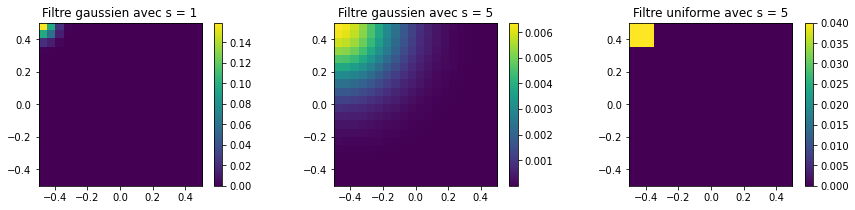

In [50]:
# Visualisation du filtre gaussien avec s = 1
zoom1 = hg1[0:20,0:20]
f_hg1 = np.abs(np.fft.fft2(zoom1))

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(zoom1, cmap=plt.cm.viridis, extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title('Filtre gaussien avec s = 1')


# Visualisation du filtre gaussien avec s = 5
zoom5 = hg5[0:20,0:20]
f_hg5 = np.abs(np.fft.fft2(zoom5))

plt.subplot(1,3,2)
plt.imshow(zoom5, cmap=plt.cm.viridis, extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title('Filtre gaussien avec s = 5')


# Visualisation du filtre uniforme avec s = 5
zoom_u5 = hu5[0:20,0:20]
f_hu5 = np.abs(np.fft.fft2(zoom_u5))

plt.subplot(1,3,3)
plt.imshow(zoom_u5, cmap = plt.cm.viridis, extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title('Filtre uniforme avec s = 5')


Le résultat montre que le filtre uniforme avec s = 5, a une intensité uniforme sur un seul petit carré. Pour le filtre gaussien avec s = 1, a une intensité variée sur un petit carré, contrairement au filtre gaussien avec un étalement de 5, où l'intensité est répartie entre 0 et 0.5 à la verticale et entre -0.5 et 0 à l'horizentale telle qu'elle est plus élevée au point (-0.5, 0.5 ) et plus faible ailleurs. 

<h3 style="color: navy bleu"> 2. b Visualisations des modules 

Après avoir visualisé les filtres, il est temps d'afficher les modules de leur réponses fréquentielles. 

Text(0.5, 1.0, 'Module du filtre uniforme avec s = 1')

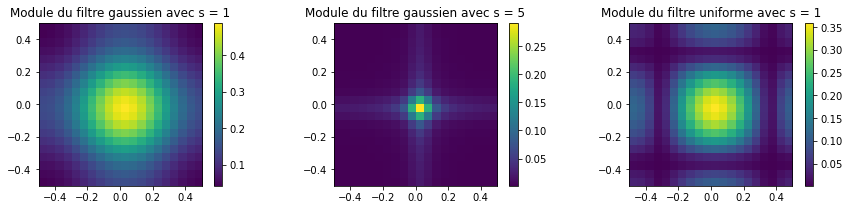

In [51]:
# Module du filtre gaussien avec s = 1
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(np.fft.fftshift(f_hg1), cmap = plt.cm.viridis, extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title('Module du filtre gaussien avec s = 1')

# Module du filtre gaussien avec s = 5

plt.subplot(1,3,2)
plt.imshow(np.fft.fftshift(f_hg5), cmap = plt.cm.viridis, extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title('Module du filtre gaussien avec s = 5')

# Module du filtre uniforme avec s = 5

plt.subplot(1,3,3)
plt.imshow(np.fft.fftshift(f_hu5), cmap = plt.cm.viridis, extent=[-.5, .5, -.5, .5])
plt.colorbar()
plt.title('Module du filtre uniforme avec s = 1')

Les filtres permettent de conserver uniquement les basses fréquences donc ils sont des filtres passe-bas. En effet, le filtre passe-bas est une transformation mathématique appliquée à des données,dans le but d'atténuer les fréquences supérieures à sa fréquence de coupure afin de conserver uniquement les basses fréquences. 


On remarque que plus l'étalement est petit (c'est l'exemple du noyau gaussien et uniforme avec s = 1), plus on a une bande de fréquence large et inversement, le noyau gaussien avec s = 5 a une largeur de la bande de fréquence plus grande. Ces deux grandeurs sont donc inversement proportionnelles.  

<h3 style="color: navy bleu"> C. Dégradation d'une image

La fonction degrad_imag prend en entrée une image $y$, un noyau de convolution $h$, un paramètre $\alpha$ et un type de dégradation $\mathcal{D}$ et renvoie en sortie une image dégradée par un flou de noyau $h$ et une perturbation $\mathcal{D}_\alpha$ qui pourra être
<ul>
<li> un bruit additif gaussien de variance $\alpha=\sigma^2$; </li>
<li> un bruit Poissonien de paramètre d'échelle $\alpha>0$. </li>
</ul>


In [52]:
def degrad_imag(y,h,alpha,D): 
    """
    y : image
    h : noyau de convolution
    alpha 
    D : bruit

    """   
    
    convolution = np.real(np.fft.ifft2(np.fft.fft2(h)* np.fft.fft2(y)))
    
    if D == "gaussien" :
        return convolution + np.sqrt(alpha)* np.random.normal(size = y.shape)

    elif D == "poisson":
        return np.random.poisson(alpha * convolution, y.shape)

<h3 style="color: navy bleu"> 1. Génération d'images dégradées 

En utilisant la fonction degrad_imag définie précédemment, nous allons générer des différentes images : 
<ul>
<li> Une image $zb$ telle que $zb$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien d'étalement $s=1$ défini dans l'exercice 1 et sans bruit.</li>
<li> Une image $zg$ telle que $zg$ est la version dégradée de l'image de Lena où l'opérateur linéaire $L$ correspond au noyau gaussien d'étalement $s=1$  défini dans l'exercice 1 et le bruit est un bruit additif gaussien de variance $100$.</li> 
</ul>
</br>

In [53]:
# Avec D est gaussien avec s = 1 et sans bruit 
zb = degrad_imag(y, hg1, 0, "gaussien")

# Avec D est gaussien avec s = 1 et un bruit additif gaussien (alpha = 100)
zg = degrad_imag(y, hg1, 100, "gaussien")

<h3 style="color: navy bleu"> 2. Affichage 

Text(0.5, 1.0, 'Image zg avec un bruit')

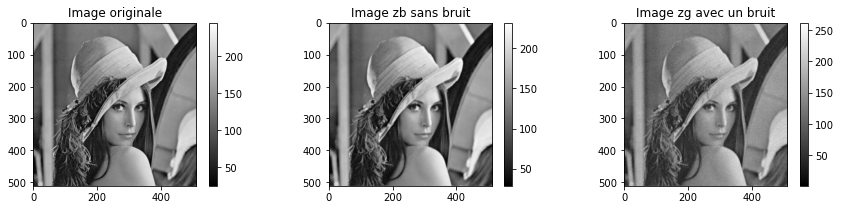

In [54]:
# Image originale 
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.imshow(y, cmap="gray")
plt.colorbar()
plt.title('Image originale')

# Image zb sans bruit
plt.subplot(1,3,2)
plt.imshow(zb, cmap="gray")
plt.colorbar()
plt.title('Image zb sans bruit')

# Image zg avec un bruit
plt.subplot(1,3,3)
plt.imshow(zg, cmap="gray")
plt.colorbar()
plt.title('Image zg avec un bruit')


Le résultat montre que l'image zb est légérement floutée par rapport à l'image originale. Concernant l'image zg, elle est largement floue par rapport aux deux autres images qui restent claires, cela est dû à l'utilisation du bruit additif gaussien avec une variance de 100. 


<h3 style="color: navy bleu"> D. Mesures de qualité

Pour comparer les performances des algorithmes de restauration, on utilisera le SNR (Signal to noise ratio). Si $\tilde{y}$ est le signal restauré et $y$ le signal original non bruité

\begin{equation}
SNR(\tilde{y},y)=10\log_{10}\left(\frac{\parallel y\parallel_2^2}{\parallel y-\tilde{y}\parallel_2^2}\right) \qquad \text{où} \quad \parallel y\parallel_2^2=\sum\limits_{n_1=0}^{N-1}\sum\limits_{n_2=0}^{N-1} |y_{n_1,n_2}|^2.
\end{equation}

On utilisera aussi le PSNR (Peak Signal to noise ratio). 

\begin{equation}
PSNR(\tilde{y},y)=10\log_{10}\left(\frac{255^2}{\parallel y-\tilde{y}\parallel_2^2}\right)
\end{equation}


In [55]:
def snr(x,xref):
    s = 10*np.log10(np.mean(xref**2)/np.mean((xref-x)**2))
    return s

def psnr(x,xref):
    s = 10*np.log10(255**2/np.mean((xref-x)**2))
    return s

Remarque : Dans le cas où le SNR (ou le PSNR) est calculé entre l'image originale et l'image bruitée ($\tilde{y}$ correspond donc à l'image dégradée $z$ ici), on parle de SNR (ou PSNR) initial.

<h3 style="color: navy bleu"> 1. Calculs du SNR et PSNR initiaux

Dans cette partie, nous calculons le SNR et le PSNR initiaux entre l'image originale de Lena et ses versions dégradées $zb$ et $zg$ obtenues ci-dessus.

In [56]:
# Application de la fonction snr 
SNR_zb = snr(zb,y)
SNR_zg = snr(zg,y)

# Application de la fonction psnr 
PSNR_zb = psnr(zb,y)
PSNR_zg = psnr(zg,y)

# Affichage 
print("SNR(zb,y) =",SNR_zb)
print("SNR(zg,y) =",SNR_zg)
print("PSNR(zb,y) =",PSNR_zb)
print("PSNR(zg,y) =",PSNR_zg)

SNR(zb,y) = 27.11464264284575
SNR(zg,y) = 21.175655471609694
PSNR(zb,y) = 32.771775149983185
PSNR(zg,y) = 26.832787978747128


On remarque qu'on a bien les valeurs attendues. Les valeurs de SNR et PSNR entre l'image bruitée zg et y sont plus petites que celles entre l'image zb et y. 

<h2 style="color: navy bleu"> IV.  Méthodes de base pour la déconvolution

On est donc dans le cas particulier où
\begin{equation}
z=\mathcal{D}_\alpha((h\star y))
\end{equation}
où
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $\mathcal{D}_\alpha$ : perturbation de paramètre $\alpha$ (un bruit)</li>
</ul>

<h3 style="color: navy bleu"> A. Méthode d'inversion

On se propose ici d'implémenter la méthode d'inversion. Cette méthode est très simple et consiste à appliquer le filtre inverse aux observations. Cela équivaut, dans le domaine de Fourier, à diviser terme à terme l'observation par la réponse fréquentielle du filtre de dégradation.

<h3 style="color: navy bleu"> 1. Implémentation du filtre inverse

Nous allons dans un premier temps implémenter une fonction inversion qui prend en entrée les observations $z$ et le noyau de convolution $h$ et qui applique la méthode du filtre inverse aux observations.

In [57]:
def inversion(z, h):
    """
    z : observations
    h : noyau
    """
    return np.real(np.fft.ifft2(np.fft.fft2(z)/np.fft.fft2(h)))

<h3 style="color: navy bleu"> 2. Application de la fonction inversion à l'image floue

Ensuite, nous appliquons le filtre inverse à l'image floue $zb$ obtenue précédemment, on affichera l'image ainsi restaurée et on calculera le SNR et le PSNR obtenus après restauration.

SNR(zb,y) initial = 27.11464264284575
SNR(zb,y) après restauration =  256.746710812151
SNR(zb,y) initial = 27.11464264284575
PSNR(zb,y) après restauration =   262.40384331928846


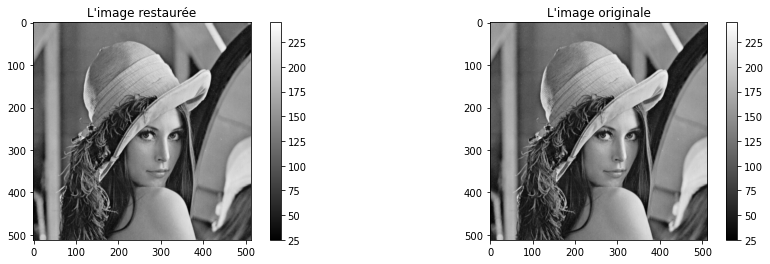

In [58]:
# Application du filtre inverse à l'image floue 𝑧𝑏
filtre_inv_zb = inversion(zb, hg1)

# Affichage de l'image restaurée
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.imshow(filtre_inv_zb, "gray")
plt.colorbar()
plt.title("L'image restaurée")

# Image originale 
plt.subplot(1,2,2)
plt.imshow(y, cmap="gray")
plt.colorbar()
plt.title("L'image originale")

# Calcul du SNR et PSNR obtenus après restauration
SNR_zb_restaure = snr(filtre_inv_zb,y)
PSNR_zb_restaure = psnr(filtre_inv_zb,y)

# SNR avant et après restauration 
print("SNR(zb,y) initial =",SNR_zb)
print("SNR(zb,y) après restauration = ", SNR_zb_restaure)

# PSNR avant et après restauration 
print("SNR(zb,y) initial =",SNR_zb)
print("PSNR(zb,y) après restauration =  ", PSNR_zb_restaure)


Le SNR et le PSNR obtenus après restauration sont très élevés par rapport aux SNR et PSNR initiaux, cela signifie que le filtre inverse permet de restaurer le maximum de détails de l'image originale et que la restauration est de bonne qualité. On peut également le remarquer sur les images affichées ( l'image restaurée ressemble à l'image originale). 

<h3 style="color: navy bleu"> 3. Application de la fonction inversion à l'image floue et bruitée 

SNR(zb,y) initial = 21.175655471609694
SNR(zb,y) après restauration =  -32.14362586877002
SNR(zb,y) initial = 21.175655471609694
PSNR(zb,y) après restauration =   -26.486493361632593


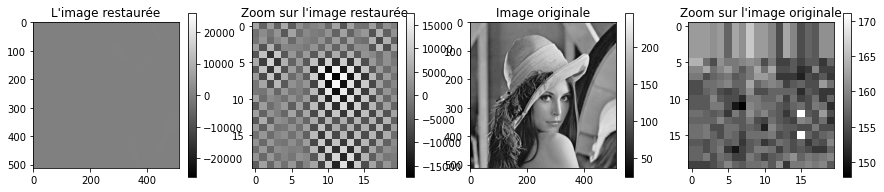

In [59]:
# Application du filtre inverse à l'image floue 𝑧𝑏
filtre_inv_zg = inversion(zg, hg1)

# Affichage de l'image restaurée
plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
plt.imshow(filtre_inv_zg, "gray")
plt.colorbar()
plt.title("L'image restaurée")

# Zoom sur l'image restaurée
plt.subplot(1,4,2)
plt.imshow(filtre_inv_zg[0:20, 0:20], "gray")
plt.colorbar()
plt.title("Zoom sur l'image restaurée")

# Image originale 
plt.subplot(1,4,3)
plt.imshow(y, cmap="gray")
plt.colorbar()
plt.title("Image originale")

# Zoom sur l'image originale 
plt.subplot(1,4,4)
plt.imshow(y[0:20, 0:20], cmap="gray")
plt.colorbar()
plt.title("Zoom sur l'image originale") 

# Calcul du SNR et PSNR obtenus après restauration
SNR_zg_restaure = snr(filtre_inv_zg,y)
PSNR_zg_restaure = psnr(filtre_inv_zg,y)

# SNR avant et après restauration 
print("SNR(zb,y) initial =",SNR_zg)
print("SNR(zb,y) après restauration = ", SNR_zg_restaure)

# PSNR avant et après restauration 
print("SNR(zb,y) initial =",SNR_zg)
print("PSNR(zb,y) après restauration =  ", PSNR_zg_restaure)


Le SNR et le PSNR obtenus après restauration sont négatifs, la restauration est donc de mauvaise qulité et il y a eu une perte d'informations et détails dûe au fait que l'image utilisée était bruitée. 

<h2 style="color: navy bleu"> V. Problème de déconvolution par l'approche régularisée type Tikhonov

On est dans le cas particulier où
\begin{equation}
z=(h\star y)+b=K_{h}(y)+b
\end{equation}
où
<ul>
<li> $z$ : observations</li>
<li> $y$ : données originales</li>
<li> $h$ : noyau de l'opérateur de convolution</li>
<li> $b$ : un bruit additif gaussien blanc centré de variance (connue) $\sigma^2$</li>
</ul>
<br>
Pour résoudre le problème de déconvolution présenté ci-dessus, on peut penser résoudre le problème de minimisation suivant (Tikhonov)
$$
\underset{y \in \mathbb{R}^{N_1 \times N_2}}{\text{min}} \tfrac{1}{2} \|z-K_{h}(y)\|^2_2 + \lambda \|y\|_2^2
$$
dont la solution analytique $\widetilde{y}$ est donnée en Fourier par
$$
\widehat{\widetilde{y}}(\omega)=\frac{\overline{\widehat{h}}(\omega)\widehat{z}(\omega)}{|\widehat{h}(\omega)|^2 + 2 \lambda},\quad \forall\omega.
$$

<h3 style="color: navy bleu"> A. Déconvolution par Tikhonov

<h3 style="color: navy bleu"> 1. Chargement de l'image et génération de l'image dégradée

Cette fonction prend en entrée les observations $z$, le noyau de convolution $h$ et le paramètre de régularisation $\lambda$, et qui retourne en sortie l'image restaurée $\widetilde{y}$ avec la méthode de Tikhonov

In [60]:
# Chargement de l'image test Lena 
Lena = mpimg.imread("lena.png")

Lena = Lena[:,:,0];
if (Lena.dtype == 'float32') :
    Lena = Lena*255
Lena = Lena.astype(float)

# Application d'un noyau gaussien avec s = 3
n = len(Lena)
kernel = gaussian(n,3)

# Génération d'une image dégradée avec la fonction degrad_imag
Lena_degradee = degrad_imag(Lena, kernel, 100, "gaussian")

<h3 style="color: navy bleu"> 2. Création de la fonction restore_tikhonov 

In [73]:
def restore_tikhonov(z, h, lambda_regular):
    """
    z : observations
    h : noyau de convolution
    lambda_regular : paramètre de régularisation 
    
    """
        
    h_fft_conj = np.conj(np.fft.fft2(h))
    h_fft = np.fft.fft2(h)
    z_fft = np.fft.fft2(z)
    
    y_tild_hat = h_fft_conj*z_fft/(np.abs(h_fft)**2 + 2* lambda_regular)
    y_tild = np.real(np.fft.ifft2(y_tild_hat))
    
    return y_tild


<h3 style="color: navy bleu"> 3. Variation du paramètre de régularisation

SNR(Lena,y) avec lambda de 0.001 : 7.532976182088066
PSNR(Lena,y) avec lambda de 0.001: 12.012421285504416

SNR(Lena,y) avec lambda de 0.01 : 15.560238227275022
PSNR(Lena,y) avec lambda de 0.01: 21.120000164569348

SNR(Lena,y) avec lambda de 0.1 : 13.453576685611747
PSNR(Lena,y) avec lambda de 0.1: 20.66818173478973

SNR(Lena,y) avec lambda de 1 : -6.146311987169506
PSNR(Lena,y) avec lambda de 1: 9.120910783037035

SNR(Lena,y) avec lambda de 10 : -26.119004127443684
PSNR(Lena,y) avec lambda de 10: 6.074273612033765

SNR(Lena,y) avec lambda de 100 : -46.11604953569905
PSNR(Lena,y) avec lambda de 100: 5.699778144406027



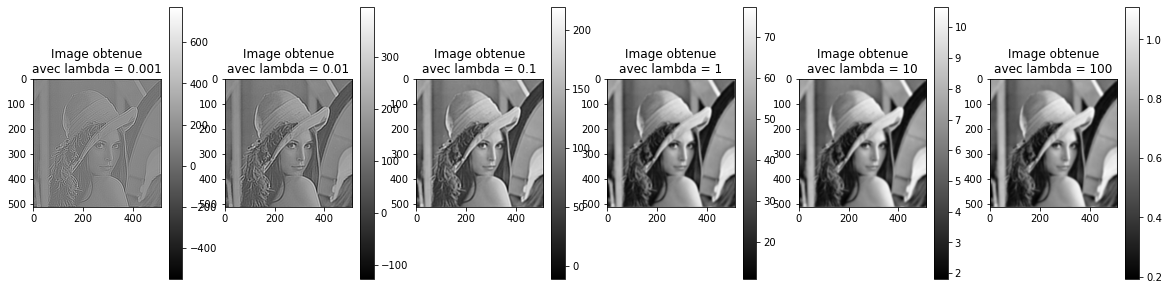

In [72]:
# Définition des valeurs de lambda sous forme d'une liste 
lambda_vect = [0.001,0.01,0.1,1,10,100]

# taille de la figure 
plt.figure(figsize=(20,5))

# Faire une boucle pour afficher chaque image associée à chaque lambda 
for i in range(len(lambda_vect)) : 

    y = np.real(restore_tikhonov(Lena, kernel, lambda_vect[i]))
    # Pour afficher les images sur une seule ligne 
    plt.subplot(1, 6, i+1)
    plt.imshow(y, cmap="gray")
    plt.colorbar()
    plt.title(f'Image obtenue\navec lambda = {lambda_vect[i]}')

    print(f'SNR(Lena,y) avec lambda de {lambda_vect[i]} : {snr(Lena,y)}')
    print(f'PSNR(Lena,y) avec lambda de {lambda_vect[i]}: {psnr(Lena,y)}\n')

Le résultat montre que pour  $\lambda = 0.01$, on a un SNR = 15.56 et PSNR = 21.12 environ, ce sont les valeurs les plus élevées parmi toutes les valeurs correspondantes à chaque lambda. On en déduit que $\lambda = 0.01$ donne la meilleure restoration de l'image mais ça reste quand même faible. 

<h2 style="color: navy bleu"> VI. Conclusion 

Tout au long de ce tp, nous avons pu utiliser l'image de Lena pour tester la transormée de Fourier, découvrir les noyaux gaussien et uniforme avec des étalements différents et analyser le rapport entre l'étalement et la largeur de la bande de fréquence.

Nous avons également traité le concept de restauration avec les deux mesures de qualité SNR et PSNR. Enfin, on a utilisé l'approche régularisée type Tikhonov avec les différentes valeurs du paramètre de régularisation. 